### Libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import random

### Data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
display('Sample records from the train dataset:', train.head())
display('Sample records from the test dataset:', test.head())

'Sample records from the train dataset:'

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


'Sample records from the test dataset:'

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


### Summary Statistics

In [3]:
display('Summary stats for train dataset:', train.describe(include = 'all').T)
display('Summary stats for test dataset:', test.describe(include = 'all').T)

'Summary stats for train dataset:'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,913000,1826,2016-01-17,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,913000,NaN,NaN,NaN,5.5,2.87228,1,3,5.5,8,10
item,913000,NaN,NaN,NaN,25.5,14.4309,1,13,25.5,38,50
sales,913000,NaN,NaN,NaN,52.2503,28.8011,0,30,47,70,231


'Summary stats for test dataset:'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,45000,NaN,NaN,NaN,22499.5,12990.5,0,11249.8,22499.5,33749.2,44999
date,45000,90,2018-02-15,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,45000,NaN,NaN,NaN,5.5,2.87231,1,3,5.5,8,10
item,45000,NaN,NaN,NaN,25.5,14.431,1,13,25.5,38,50


In [4]:
display('Count of missing data in train dataset:\n', train.isna().sum())
display('Count of missing data in test dataset:\n', test.isna().sum())

'Count of missing data in train dataset:\n'

date     0
store    0
item     0
sales    0
dtype: int64

'Count of missing data in test dataset:\n'

id       0
date     0
store    0
item     0
dtype: int64

In [5]:
display('Cross-tabulating stores and items in the train dataset:', pd.crosstab(train.item, train.store))
display('Cross-tabulating stores and items in the test dataset:', pd.crosstab(test.item, test.store))

'Cross-tabulating stores and items in the train dataset:'

store,1,2,3,4,5,6,7,8,9,10
item,,,,,,,,,,
1,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
2,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
3,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
4,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
5,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
6,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
7,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
8,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
9,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826


'Cross-tabulating stores and items in the test dataset:'

store,1,2,3,4,5,6,7,8,9,10
item,,,,,,,,,,
1,90,90,90,90,90,90,90,90,90,90
2,90,90,90,90,90,90,90,90,90,90
3,90,90,90,90,90,90,90,90,90,90
4,90,90,90,90,90,90,90,90,90,90
5,90,90,90,90,90,90,90,90,90,90
6,90,90,90,90,90,90,90,90,90,90
7,90,90,90,90,90,90,90,90,90,90
8,90,90,90,90,90,90,90,90,90,90
9,90,90,90,90,90,90,90,90,90,90


#### Observations
<ol>
    <li>The <i>train</i> dataset has 913,000 records for 10 stores. For each store there might be upto 50 items sold.
    <li>The <i>test</i> dataset has 45,000 records for 10 stores. For each store there might be upto 50 items sold.
    <li>There is no missing data in either train or test dataset.
    <li>There are the same number of records for every store-item pair in the train (1826 per pair) and test (90 per pair) datasets.
    <li>The data fields must be appropriately typecasted.
    <ul>
        <li>date field to <i>type datetime</i>
        <li>store field to <i>type category</i>
        <li>item field to <i>type category</i>
    </ul>
    
</ol>

#### Typecasting the data fields

In [6]:
train.date = pd.to_datetime(train.date, format = '%Y-%m-%d')
test.date = pd.to_datetime(test.date, format = '%Y-%m-%d')

train.store = train.store.astype('category')
test.store = test.store.astype('category')

train.item = train.item.astype('category')
test.item = test.item.astype('category')

### Frequency Plots for Daily Sales over Time Period

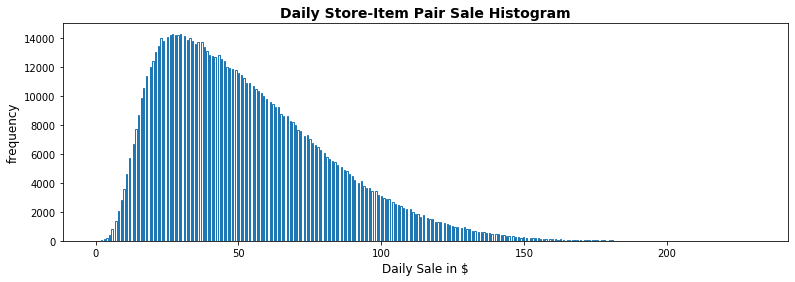

The daily sale across all store-item pairs ranges from 0 to 231.
The mean daily sale for a store-item pair is 52, the median is 47 and the standard deviation is 28.



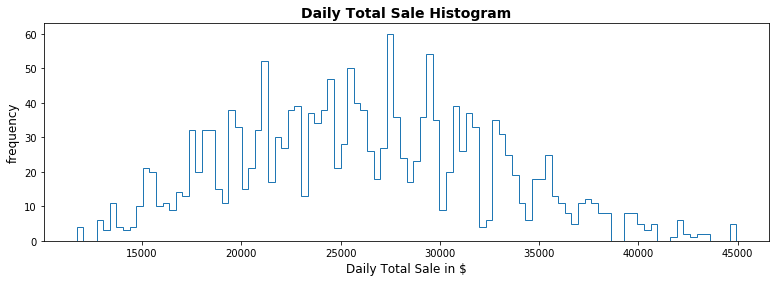

The daily total sale ranges from 11709 to 44936
The mean daily total sale is 26125, the median is 25839 and the standard deviation is 6418.



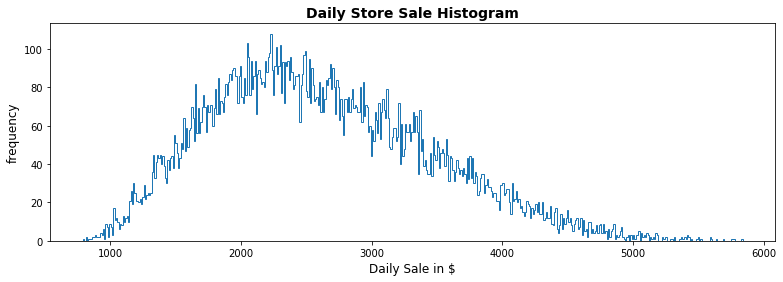

The daily sale in a store ranges from 790 to 5839
The mean daily sale in a store is 2612, the median is 2515 and the standard deviation is 833.



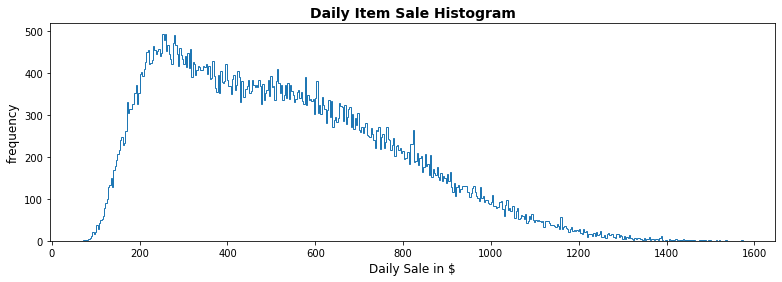

The daily sale of an item ranges from 71 to 1573
The mean daily sale for an item is 522, the median is 489 and the standard deviation is 255.



In [7]:
plt.figure(figsize = (13, 4))
plt.hist(train.sales, histtype = 'step', bins = 500)
plt.xlabel('Daily Sale in $', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Daily Store-Item Pair Sale Histogram', fontsize = 14, fontweight = 'bold')
plt.show()

print('The daily sale across all store-item pairs ranges from %i to %i.' 
      % (np.min(train.sales), np.max(train.sales)))
print('The mean daily sale for a store-item pair is %i, the median is %i and the standard deviation is %i.\n' 
      % (np.mean(train.sales), np.median(train.sales), np.std(train.sales)))

plt.figure(figsize = (13, 4))

dailysales_all = train.groupby(by = ['date'])['sales'].sum()
plt.hist(dailysales_all, histtype = 'step', bins = 100)
plt.xlabel('Daily Total Sale in $', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Daily Total Sale Histogram', fontsize = 14, fontweight = 'bold')
plt.show()

print('The daily total sale ranges from %i to %i' % (dailysales_all.min(), dailysales_all.max()))
print('The mean daily total sale is %i, the median is %i and the standard deviation is %.i.\n' 
      % (dailysales_all.mean(), dailysales_all.median(), dailysales_all.std()))

plt.figure(figsize = (13, 4))

dailysales_sto = train.groupby(by = ['store', 'date'])['sales'].sum()
plt.hist(dailysales_sto, histtype = 'step', bins = 500)
plt.xlabel('Daily Sale in $', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Daily Store Sale Histogram', fontsize = 14, fontweight = 'bold')
plt.show()

print('The daily sale in a store ranges from %i to %i' % (dailysales_sto.min(), dailysales_sto.max()))
print('The mean daily sale in a store is %i, the median is %i and the standard deviation is %.i.\n' 
      % (dailysales_sto.mean(), dailysales_sto.median(), dailysales_sto.std()))

plt.figure(figsize = (13, 4))

dailysales_itm = (train.groupby(by = ['item', 'date'])['sales'].sum())
plt.hist(dailysales_itm, histtype = 'step', bins = 500)
plt.xlabel('Daily Sale in $', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Daily Item Sale Histogram', fontsize = 14, fontweight = 'bold')
plt.show()

print('The daily sale of an item ranges from %i to %i' % (dailysales_itm.min(), dailysales_itm.max()))
print('The mean daily sale for an item is %i, the median is %i and the standard deviation is %.i.\n' 
      % (dailysales_itm.mean(), dailysales_itm.median(), dailysales_itm.std()))

#### Observations

<ol>
    <li>The per day sales plot for store-item pairs, total sales, stores and items are all right skewed. The per day plot for total sales and stores sales have the least skew and the least relative standard deviation (std. dev/mean).
</ol>

### Timeseries Plots for Daily Sales over Time Period

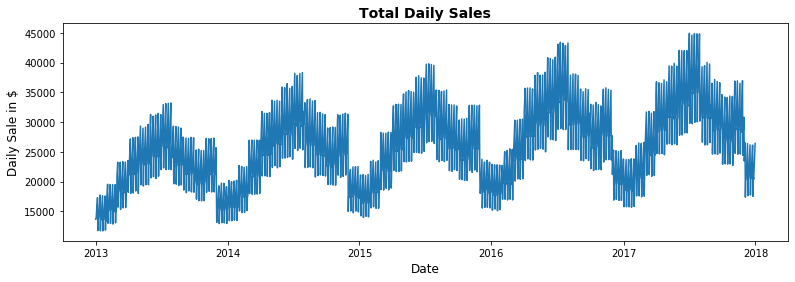

In [8]:
fig, ax = plt.subplots(figsize = (13, 4))

ax.plot(dailysales_all.index, dailysales_all)
ax.set_title('Total Daily Sales', fontdict = {'fontsize' : 14, 'fontweight' : 'bold'})
ax.set_ylabel('Daily Sale in $', fontdict = {'fontsize' : 12})
ax.set_xlabel('Date', fontdict = {'fontsize' : 12})

plt.show()


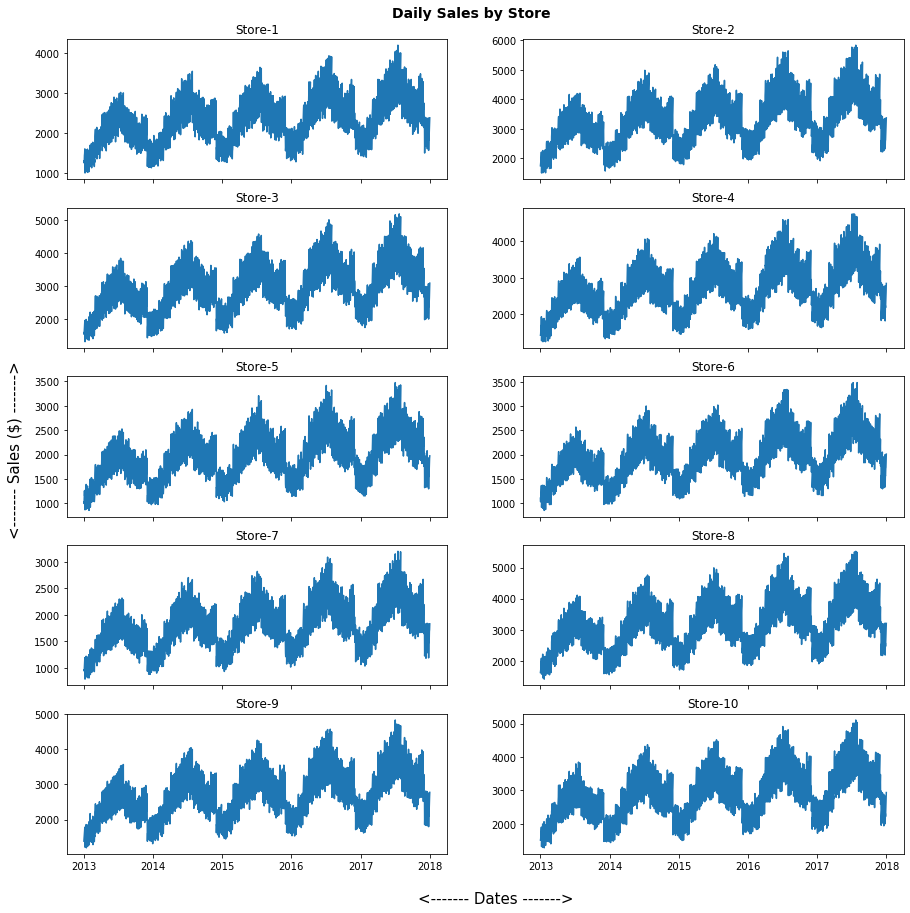

In [9]:
n_stores = len(train.store.unique())

# Setting up parameters for the plot
n_cols = 2
n_rows = np.int(np.ceil(n_stores/n_cols))
store_id = 1

fig, ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (15, 15), sharex = 'col')
plt.suptitle('Daily Sales by Store', x = 0.5, y = 0.91, size = 14, weight = 'bold')
for r in range(n_rows):
    for c in range(n_cols):
        ax[r, c].plot(dailysales_sto[store_id].index, dailysales_sto[store_id])
        ax[r, c].set_title('Store-%i' % store_id, fontdict = {'fontsize' : 12})
        store_id += 1

fig.text(0.07, 0.5, '<------- Sales ($) ------->', rotation = 'vertical', va = 'center', size = 15)
fig.text(0.45, 0.08, '<------- Dates ------->', size = 15)
plt.show()

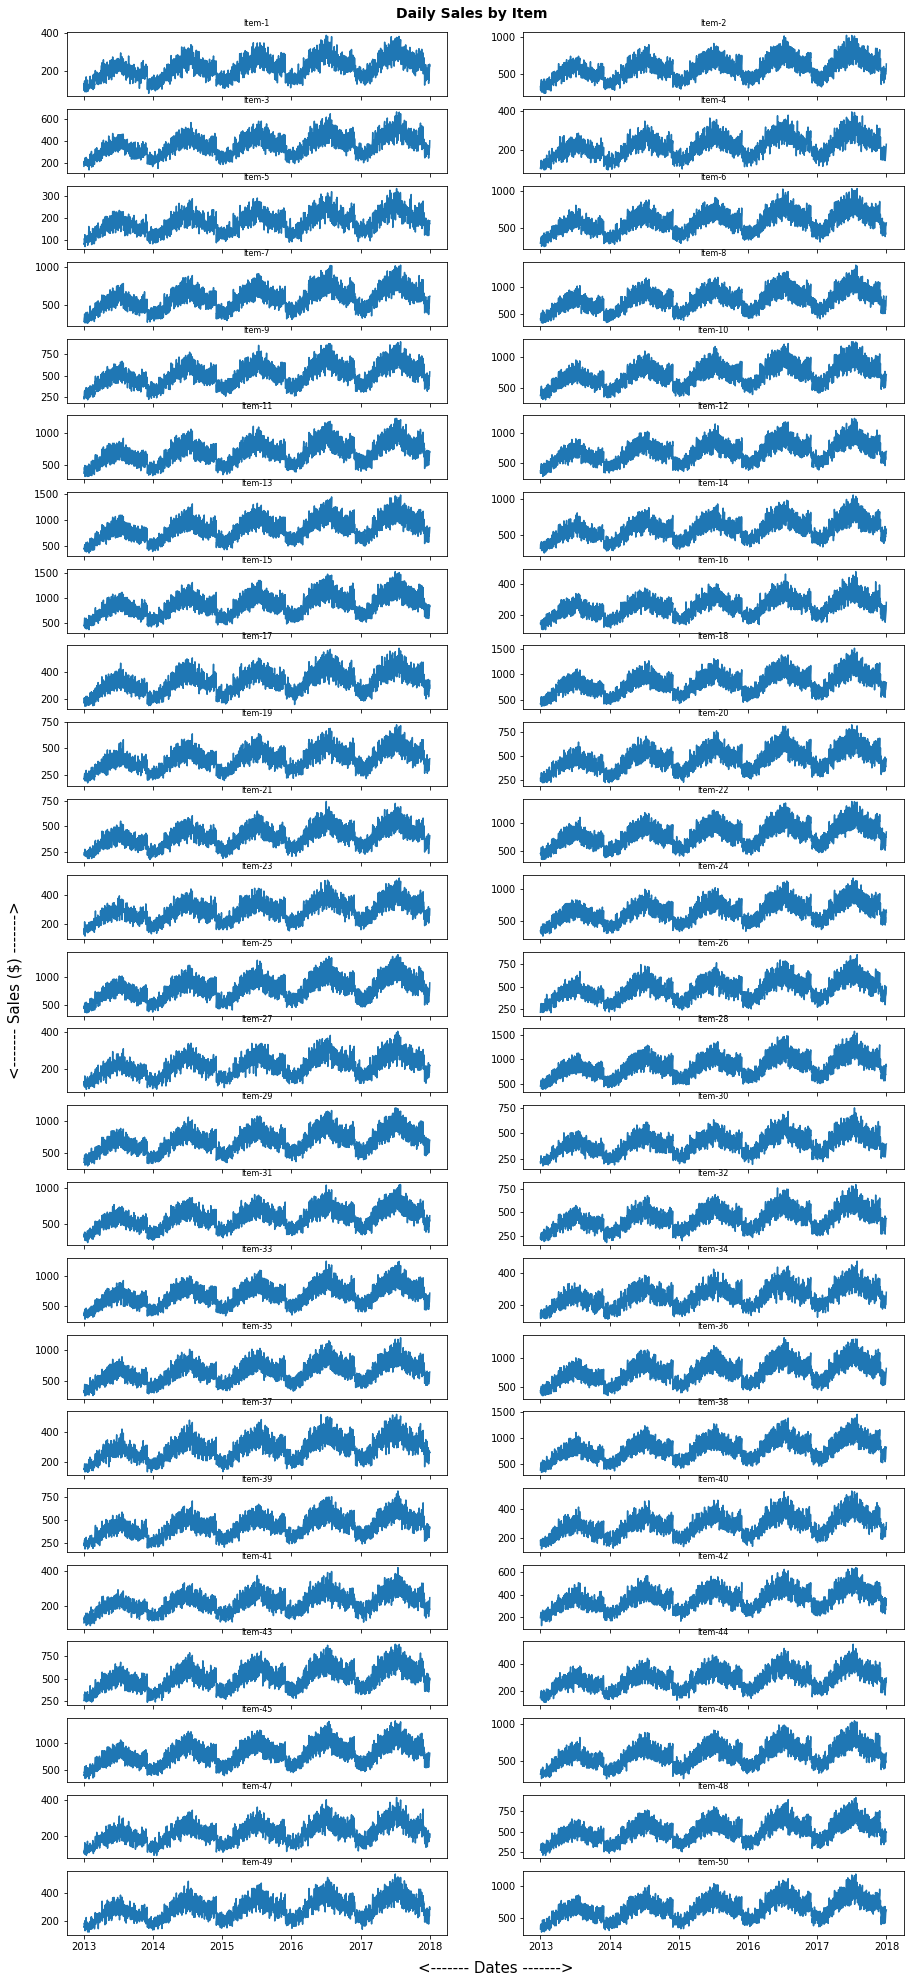

In [10]:
n_items = len(train.item.unique())

# Setting up parameters for the plot
n_cols = 2
n_rows = np.int(np.ceil(n_items/n_cols))
item_id = 1

fig, ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (15, 35), sharex = 'col')
plt.suptitle('Daily Sales by Item', x = 0.5, y = 0.89, size = 14, weight = 'bold')
for r in range(n_rows):
    for c in range(n_cols):
        foo = train.query('item == @item_id').groupby('date')['sales'].sum()
        ax[r, c].plot(dailysales_itm[item_id].index, dailysales_itm[item_id])
        ax[r, c].set_title('Item-%i' % item_id, fontdict = {'fontsize' : 8})
        item_id += 1

fig.text(0.07, 0.5, '<------- Sales ($) ------->', rotation = 'vertical', va = 'center', size = 15)
fig.text(0.45, 0.11, '<------- Dates ------->', size = 15)
plt.show()

#### Exploring Weekly Pattern

<ol>
    <li>We <i>zoom-in</i> on the daily sales plot to better visualize the pattern of daily sales. We pick at random a 100 day interval to investigate the weekly trend.
    <li>The plots for total daily sales, total daily sales by store and total daily sales by item show similar trend and we make the reasonable assumption that <i>zooming-in</i> only on the total daily sales plot will reveal patterns that are common to all the three plots.
    <li>For each of the 5 years of the timeseries, we visualise the daily sales for every quarter.
</ol>

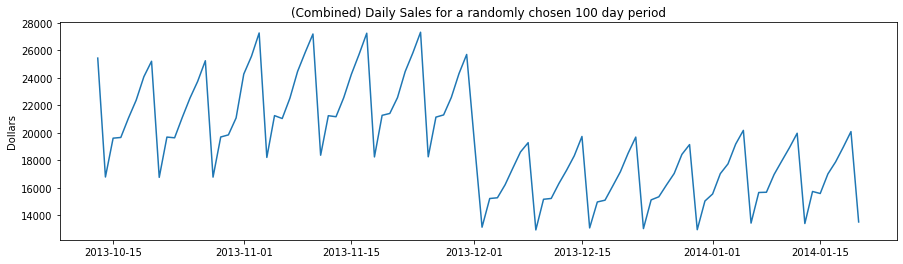

In [11]:
date_range = len(train.date.unique())

# Picking the sample start date. To ensure we get 100 continous days, we choose the start date such that we are
# guaranteed 100 continous days.
random.seed(1970)
sample_all_start = random.sample(range(date_range-101), 1)[0]   # random.sample() returns a list
sample_all_end = sample_all_start + 100
df_sample = dailysales_all[sample_all_start:sample_all_end]

fig, ax = plt.subplots(nrows = 1, figsize = (15, 4))
ax.plot(df_sample.index, df_sample)
ax.set_ylabel('Dollars')
ax.set_title('(Combined) Daily Sales for a randomly chosen 100 day period')
plt.show()

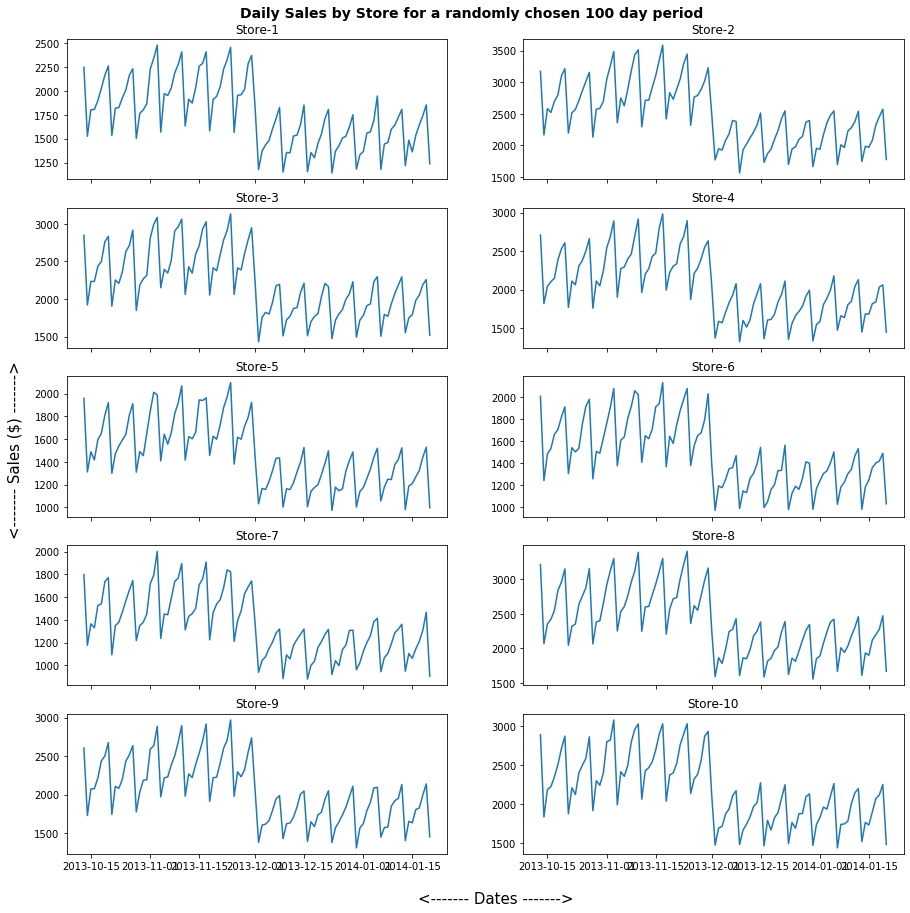

In [12]:
n_stores = len(train.store.unique())

# Setting up parameters for the plot
n_cols = 2
n_rows = np.int(np.ceil(n_stores/n_cols))
store_id = 1

fig, ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (15, 15), sharex = 'col')
plt.suptitle('Daily Sales by Store for a randomly chosen 100 day period', x = 0.5, y = 0.91, 
             size = 14, weight = 'bold')
for r in range(n_rows):
    for c in range(n_cols):
        df_sample = dailysales_sto[store_id][sample_all_start:sample_all_end]
        ax[r, c].plot(df_sample.index, df_sample)
        ax[r, c].set_title('Store-%i' % store_id, fontdict = {'fontsize' : 12})
        store_id += 1

fig.text(0.07, 0.5, '<------- Sales ($) ------->', rotation = 'vertical', va = 'center', size = 15)
fig.text(0.45, 0.08, '<------- Dates ------->', size = 15)
plt.show()

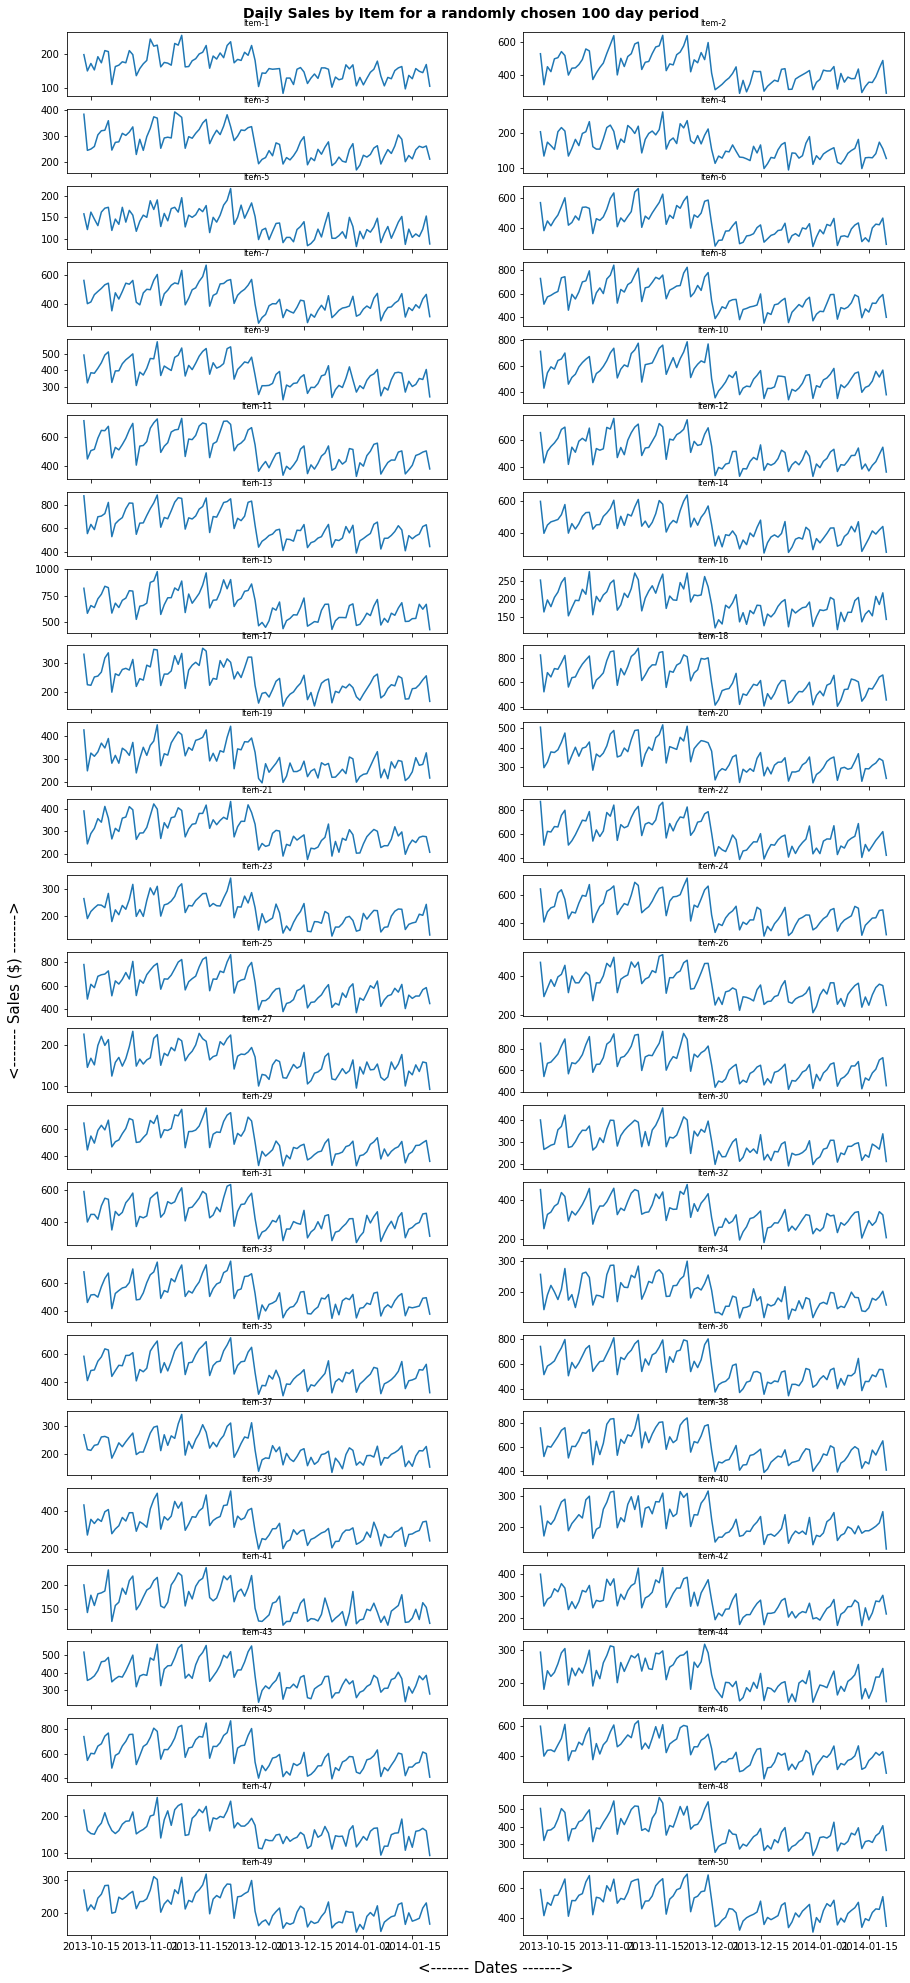

In [13]:
n_items = len(train.item.unique())

# Setting up parameters for the plot
n_cols = 2
n_rows = np.int(np.ceil(n_items/n_cols))
item_id = 1

fig, ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (15, 35), sharex = 'col')
plt.suptitle('Daily Sales by Item for a randomly chosen 100 day period', x = 0.5, y = 0.89, 
             size = 14, weight = 'bold')
for r in range(n_rows):
    for c in range(n_cols):
        df_sample = dailysales_itm[item_id][sample_all_start:sample_all_end]
        ax[r, c].plot(df_sample.index, df_sample)
        ax[r, c].set_title('Item-%i' % item_id, fontdict = {'fontsize' : 8})
        item_id += 1

fig.text(0.07, 0.5, '<------- Sales ($) ------->', rotation = 'vertical', va = 'center', size = 15)
fig.text(0.45, 0.11, '<------- Dates ------->', size = 15)
plt.show()

#### Observations
<ol>
    <li>Daily sales (combined over all stores) exhibits a specific patterns:
        <ul>
            <li>With a week, the daily sales exhibit a sawtooth pattern.
            <li>Within a year, sales are cyclical, increasing month-on-month for about half the year and then decreasing month-on-month for the rest of the year. This monthly pattern is repeated every year.
            <li>Year-on-year, the month-over-month sales (same month across different years) show an upward trend.
        </ul>
    <li>Individual store sales exhibit similar pattern for all stores, which in turn, is similar to the overall daily sales pattern.
    <li>Individual item sales exhibit similar pattern for all items, which in turn, is similar to the overall daily sales pattern.
</ol>

### Narrowing the Problem Definition
<ul>
    <li>The original problem requires use to make predictions for 500 distinct timeseries (50 products * 10 stores) which will require significant time and effort. 
    <li>Since the purpose of this project is to gain familiarity with techinques to deal with timeseries, we have narrowed down the problem definition so as to make the task more manageable.
    <li>We will aggregate monthly sales across all products and all stores and work with this monthly timeseries.
</ul>        

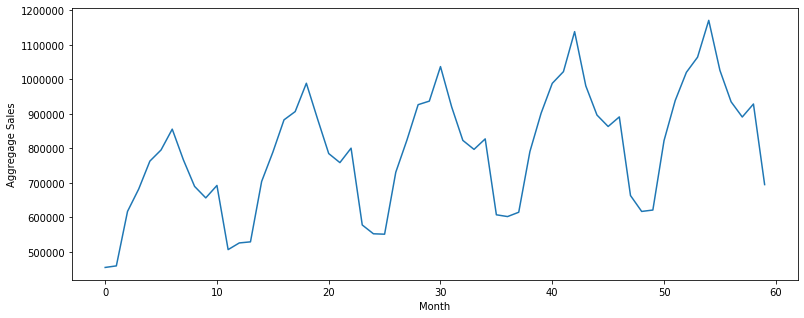

In [15]:
# Defining the new monthly timeseries.
ts_monthly = pd.Series(data = train.groupby([train.date.dt.year, train.date.dt.month])['sales'].sum().values)

# Plotting the new monthly timeseries.
plt.figure(figsize = (13, 5))
plt.plot(ts_monthly.index, ts_monthly)
plt.xlabel("Month")
plt.ylabel("Aggregage Sales")
plt.show()

#### Observations
<ul>
    <li>The plot of the monthly sales show a clear pattern that repeats year after year.
    <li>The series shows an upward trend from year to year.

### Investigating Seasonal Decomposition

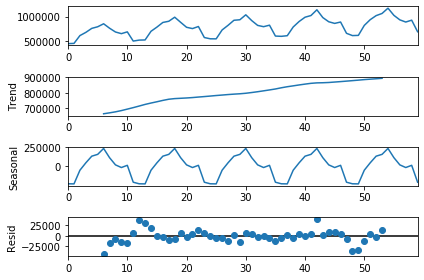

In [34]:
decomposition = seasonal_decompose(ts_monthly, period = 12)
decomposition.plot()
plt.show()

#### Observations
<ul>
    <li>The seasonal decomposition plots reveal that there is indeed an upward trend in the monthly timeseries.
    <li>Moreover, the periodicity of the timeseries is 12 (months).
</ul>